# Projek 4: Clustering
Kelompokan pengguna kartu kredit berdasarkan karakteristik tertentu ke dalam beberapa cluster.
## Anggota Kelompok:
- Nabila Zulfika Hemadewi
- Vista Sasmita Padmanagara

---

### Credit Card Clustering

Bank adalah lembaga keuangan yang menghimpun dana dari masyarakat dan menyalurkan kembali dana tersebut ke masyarakat serta memberikan jasanya dalam lalulintas pembayaran dan peredaran uang. Pada umumnya Bank dikenal sebagai lembaga keuangan yang kegiatan utamanya menerima simpanan, giro, tabungan dan deposito. Kemudian bank dikenal juga sebagai tempat untuk meminjam uang (kredit) bagi masyarakat yang membutuhkannya. 

Persaingan antar-bank saat ini menjadi sangat tinggi membuat setiap perusahaan harus memiliki strategi pemasaran produk perbankannya. Segmentasi pasar adalah salah satu strategi dalam dunia bisnis dengan mengelompokkan produk yang dimiliki sesuai dengan kesamaan, kemiripan, minat serta kebutuhan pelanggan. n. Alternatif strategi terhadap kegiatan pemasaran yang dilakukan sangat diperlukan agar perusahaan semakin tumbuh dan berkembang. Strategi pemasaran yang tepat dengan menetapkan segementasi pasar yang sesuai sasaran akan mempengaruhi pertumbuhan kreditnya.

Dataset pada project ini menggunakan credit card dataset pada kaggle https://www.kaggle.com/datasets/arjunbhasin2013/ccdata. Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut yaitu :

1. **CUST_ID**, Identifikasi Pemegang Kartu Kredit (Kategoris)
2. **BALANCE**, Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian
3. **BALANCE_FREQUENCY**, Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
4. **PURCHASES**, Jumlah pembelian yang dilakukan dari akun
5. **ONEOFF_PURCHASES**, Jumlah pembelian maksimum dilakukan dalam sekali jalan
6. **INSTALLMENTS_PURCHASES**, Jumlah pembelian dilakukan secara angsuran
7. **CASH_ADVANCE**, Uang tunai di muka yang diberikan oleh pengguna
8. **PURCHASES_FREQUENCY**, Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
9. **ONEOFF_PURCHASES_FREQUENCY**, How sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)
10. **PURCHASES_INSTALLMENTS_FREQUENCY**, Seberapa sering pembelian secara mencicil dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
11. **CASH_ADVANCE_FREQUENCY**, Seberapa sering uang tunai di muka dibayarkan
12. **CASH_ADVANCE_TRX**, Jumlah Transaksi yang dilakukan dengan "Cash in Advance"
13. **PURCHASES_TRX**, Jumlah transaksi pembelian yang dilakukan
14. **CREDIT_LIMIT**, Batas Kartu Kredit untuk pengguna
15. **PAYMENTS**, Jumlah Pembayaran yang dilakukan oleh pengguna
16. **MINIMUM_PAYMENTS**, Jumlah minimum pembayaran yang dilakukan oleh pengguna
17. **PRC_FULL_PAYMENT**, Persentase pembayaran penuh yang dibayarkan oleh pengguna
18. **TENURE**, Jangka waktu layanan kartu kredit untuk pengguna

# Import Library & Preparing Data

In [ ]:
import pandas as pd
import numpy as np

# visualize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-whitegrid")

# labelEncoder
from sklearn.preprocessing import LabelEncoder

# scaling data
from sklearn.preprocessing import StandardScaler

# splitting data
from sklearn.model_selection import train_test_split

# PCA
from sklearn.decomposition import PCA

# elbow method
from yellowbrick.cluster import KElbowVisualizer

# modelling
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

# Evaluation Model
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# saving model
import pickle

In [ ]:
#load the data
df = pd.read_csv('/content/drive/MyDrive/tugas_studi/CC_GENERAL.csv')
# df = df.round(2)

**Jumlah dimensi data**

In [ ]:
df.shape

(8950, 18)

**Tampilan data**

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Informasi data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Data Cleaning

Pembersihan data adalah tahap yang sangat penting sebelum pengolahan data untuk analisis maupun modelling dilakukan. Pastikan data yang kita miliki sudah tidak mengandung missing values/invalid values, maupun data duplikat. 

In [ ]:
df.drop(columns=['CUST_ID'], inplace=True)

**Missing values**

In [ ]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat sebanyak 314 missing values dalam data, untuk ini kita bisa lakukan **dropna** atau **fillna**, tergantung pada keputusan yang sudah ditentukan. Pada kasus ini kami memutuskan untuk melakukan fillna terhadap data. CREDIT_LIMIT yang hanya memiliki 1 missing values akan diisi dengan mean(), sedangkan untuk MINIMUM_PAYMENTS yang memiliki 313 missing values akan diisi dengan median().

In [ ]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [ ]:
df.isnull().sum().sum()

0

Missing values berhasil teratasi!

**Duplikasi Data**

In [ ]:
df.duplicated().sum()

0

Tidak terdapat nilai duplikat dalam data.

# Exploratory Data Analysis (EDA)

**Cek statistik deskriptif**

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# df.to_csv("credit-card-general-is-clean.csv")

# Preprocessing Data

**Data Normalized**

In [ ]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

feat_cols = ['feature'+str(i) for i in range (scaled_X.shape[1])]
X = pd.DataFrame(scaled_X, columns=feat_cols)

In [ ]:
X.shape

(8950, 17)

In [ ]:
X.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-0.341250,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,-0.228307,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-0.326875,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-0.338305,0.329200,-4.122768
8949,-0.572575,-0.889033,0.042146,0.301732,-0.454576,-0.406205,0.439310,1.556082,-0.916995,0.990398,-0.182998,0.333524,-0.905464,-0.576869,-0.324358,-0.525551,-4.122768


**Principal Component Analysis (PCA)**

In [ ]:
pca = PCA(n_components=2) 
reduced_X = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2'])

In [ ]:
reduced_X.tail()

,PC1,PC2
8945,-0.362484,-2.013407
8946,-0.580727,-1.675626
8947,-0.928899,-1.808022
8948,-2.337779,-0.653592
8949,-0.557956,-0.400568


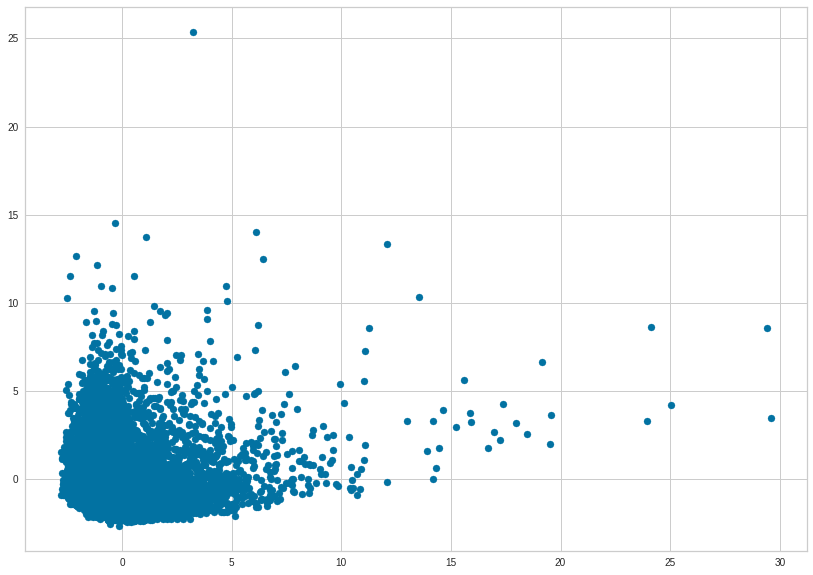

In [ ]:
plt.figure(figsize=(14, 10))
plt.scatter(reduced_X['PC1'], reduced_X['PC2'])
plt.show()

# K-MEANS

### Elbow Method
Elbow method adalah metode yang sering dipakai untuk menentukan jumlah cluster yang akan digunakan pada k-means clustering.

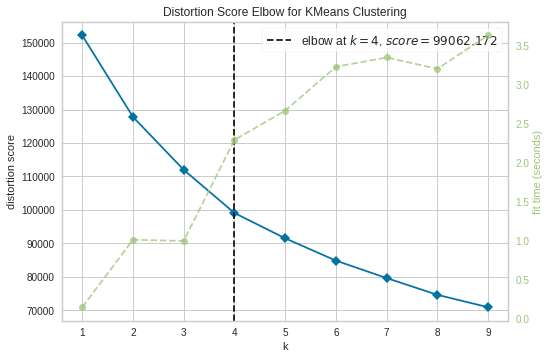

In [ ]:
# Instantiate the clustering model and visualizer 
model = KMeans() 
visualizer = KElbowVisualizer(model, k=(1,10)) 
 
visualizer.fit(X) # Fit the data to the visualizer 
visualizer.show() # Finalize and render the figure 

Berdasarkan plot metode elbow, dapat dilihat bahwa cluster berjumlah 4 adalah yang paling optimal.

### Clustering with K-Means

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
model_fit = kmeans.fit(X)

In [ ]:
cluster = kmeans.predict(X)

In [ ]:
reduced_X['cluster'] = cluster
reduced_X

,PC1,PC2,cluster
0,-1.683624,-1.072299,3
1,-1.134171,2.509099,1
2,0.969368,-0.383577,0
3,-0.888250,0.004611,3
4,-1.600011,-0.683856,3
...,...,...,...
8945,-0.362484,-2.013407,0
8946,-0.580727,-1.675626,0
8947,-0.928899,-1.808022,0
8948,-2.337779,-0.653592,3


In [ ]:
reduced_centers = pca.transform(model_fit.cluster_centers_)
reduced_centers

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


array([[ 0.95809055, -1.11238961],
       [-0.46536993,  3.50778312],
       [ 6.52104371,  0.74035144],
       [-1.34112415, -0.19037625]])

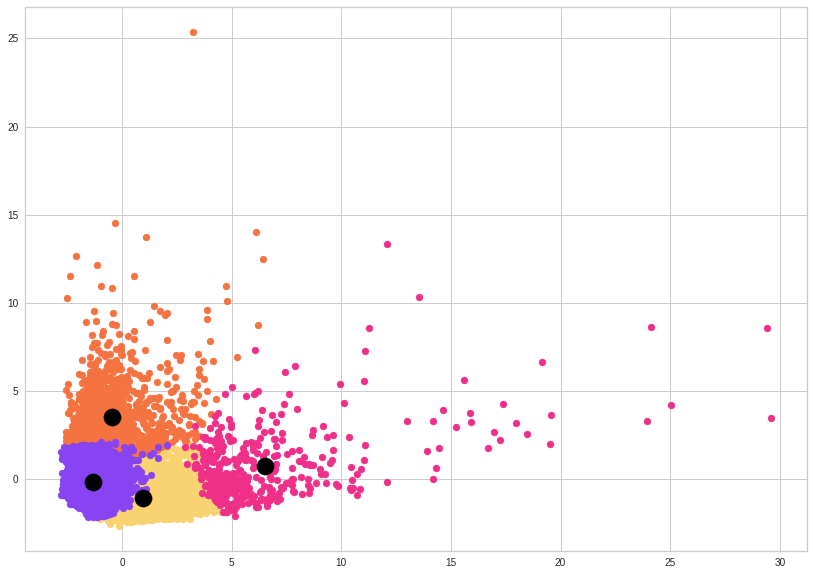

In [ ]:
plt.figure(figsize=(14, 10))

plt.scatter(reduced_X[reduced_X['cluster'] == 0].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 0].loc[:, 'PC2'], color='#F9D371')
plt.scatter(reduced_X[reduced_X['cluster'] == 1].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 1].loc[:, 'PC2'], color='#F47340')
plt.scatter(reduced_X[reduced_X['cluster'] == 2].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 2].loc[:, 'PC2'], color='#EF2F88')
plt.scatter(reduced_X[reduced_X['cluster'] == 3].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 3].loc[:, 'PC2'], color='#8843F2')

plt.scatter(reduced_centers[:,0], reduced_centers[:, 1], color='black', marker='o', s=300)

plt.show()

# Exploratory Data Analysis (EDA)

In [ ]:
df['cluster'] = cluster

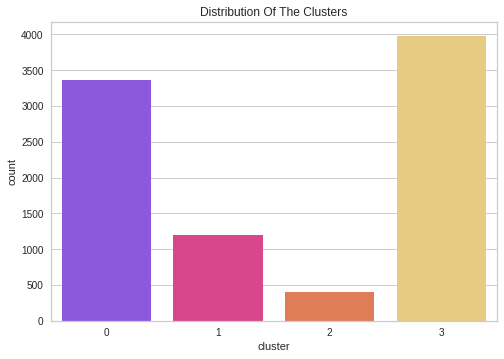

In [ ]:
#Plotting countplot of clusters
colors = ["#8843F2","#EF2F88","#F47340", "#F9D371"]
pl = sns.countplot(x=df["cluster"], palette= colors)
pl.set_title("Distribution Of The Clusters")
plt.show()

**Segmentasi Pasar:**
- Pasar Cukup Besar [0]
- Pasar Cukup Kecil [1]
- Pasar Kecil [2]
- Pasar Besar [3]

In [ ]:
eval_df = df.replace({
    'cluster': {
        0: 'Pasar Cukup Besar',
        1: 'Pasar Cukup Kecil',
        2: 'Pasar Kecil',
        3: 'Pasar Besar'
        }
})
eval_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,Pasar Besar
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,Pasar Cukup Kecil
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,Pasar Cukup Besar
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,Pasar Besar
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,Pasar Besar


### Feature Importance

Mengetahui fitur apa saja yang memiliki pengaruh besar terhadap target yang kita prediksi pada modelling adalah suatu keharusan, dengan informasi ini bisa membuat kita lebih baik dalam melakukan analisa dan jadi lebih mengerti juga tentang data itu sendiri. Pengetahuan tentang fitur penting dalam data juga akan membantu kita memilih (features selection) yang paling tepat digunakan dalam modelling nantinya.

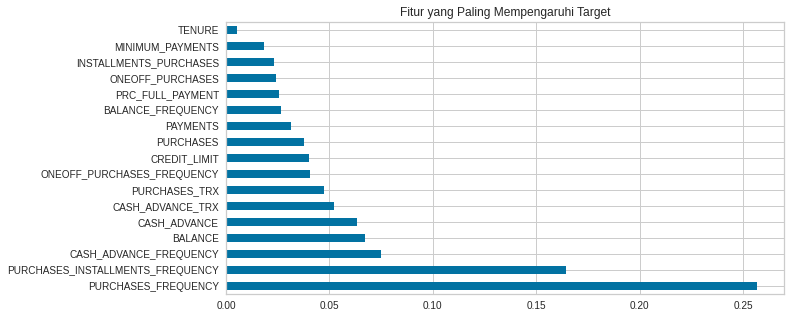

In [ ]:
X = eval_df.drop(['cluster'], axis=1)
y = eval_df['cluster']

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

#plot the graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Fitur yang Paling Mempengaruhi Target")

plt.show()

In [ ]:
eval_df.to_csv("df_cluster.csv")

Dari diagram diatas diketahui bahwa **PURCHASES_FREQEUNCY** dan **PURCHASES_INSTALLMENTS_FREQUENCY** adalah 2 fitur yang paling berpengaruh terhadap target yang kita tentukan yaitu cluster.

## Purchases & Installments Purchases

Penjelasan:
- Purchases artinya pembelian barang langsung lunas tanpa cicilan.
- Installments Purchases artinya pembelian barang dengan cicilan.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


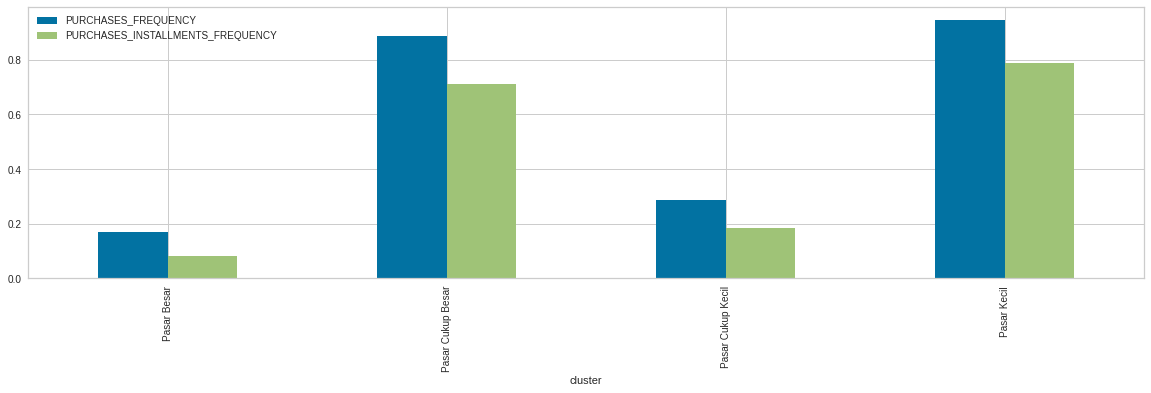

In [ ]:
eval_df.groupby('cluster')['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY'].mean().plot(kind='bar', figsize=(20,5))
plt.show()

Untuk kedua fitur ini, Pasar Cukup Besar dan Pasar Kecil sangatlah mendominasi, yang artinya kedua pasar ini memiliki frekuensi pembelian barang dibayar lunas dan pembelian barang cicilan sangatlah sering.

**Mari kita cek angka rata-rata pembelian yang dilakukan tiap kelompok!**

In [ ]:
eval_df.groupby('cluster')['PURCHASES', 'INSTALLMENTS_PURCHASES'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,PURCHASES,INSTALLMENTS_PURCHASES
cluster,,
Pasar Besar,270.213240,60.464108
Pasar Cukup Besar,1236.263333,642.541696
Pasar Cukup Kecil,501.862982,181.759123
Pasar Kecil,7681.620098,2587.208264


Dari tabel diatas terlihat sekali:
- Betapa tingginya angka rata-rata pembelian yang dilakukan **Pasar Kecil** yaitu 7681 USD pembelian barang dibayar lunas dan 2587 USD pembelian barang cicilan.
- Disusul Pasar Cukup besar yang angka rata-rata pembelian barang dibayar lunas sebesar 1236 USD dan pembelian barang cicilan sebesar 642 USD.
- Pasar Besar dan Pasar Cukup Kecil memiliki rata-rata pembelian yang cukup rendah hanya berkisar diantara 60 USD sampai 500 USD.
- Pasar Besar adalah kelompok dengan jumlah pengeluaran paling rendah 

In [ ]:
eval_df.groupby('cluster')['PURCHASES', 'INSTALLMENTS_PURCHASES'].min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,PURCHASES,INSTALLMENTS_PURCHASES
cluster,,
Pasar Besar,0.00,0.0
Pasar Cukup Besar,8.40,0.0
Pasar Cukup Kecil,0.00,0.0
Pasar Kecil,900.87,0.0


Dari data diatas didapatkan:
- Pasar Cukup Besar dan Pasar Kecil merupakan kelompok dengan kebiasaan pembelian barang paling sering.
- Pasar Kecil memiliki kebiasaan paling sering melakukan pembelian barang dengan jumlah pengeluaran paling rendah dari seorang customer di kelompok ini sudah mencapai angka 900 USD. 

In [ ]:
eval_df.groupby('cluster')['PURCHASES', 'INSTALLMENTS_PURCHASES'].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,PURCHASES,INSTALLMENTS_PURCHASES
cluster,,
Pasar Besar,4900.00,3000.00
Pasar Cukup Besar,6520.00,4538.84
Pasar Cukup Kecil,7194.53,4059.93
Pasar Kecil,49039.57,22500.00


Ya, semakin terlihat jelas bahwa memang **Pasar Kecil adalah kelompok pasar yang diisi oleh masyarakat menengah keatas yang berpendapatan tinggi dan memang memiliki kebutuhan yang sangat besar juga terhadap kartu kredit**, lihatlah tabel max() yang menunjukan ada seorang customer credit card kita yang bahkan sampai menghabiskan uang sebesar 49039 USD untuk pembelian barang dibayar lunas dan 22500 USD untuk pembelian barang cicilan, ini adalah angka yang cukup fantastis! Bahkan customer dengan pengeluaran terendah di kelompok ini sudah sampai menghabiskan 900 USD, perbedaan yang sangat jauh dari kelompok pasar lainnya.

## Cash Advance & Balance Analysis

Penjelasan:
- Cash advance artinya tarik tuna. Nah! cash advance menggunakan uang tunai hasil penarikan dari kartu kredit yang sebenarnya bukan uang milik anda. Jadi anda harus melakukan pembayaran layaknya pembelian menggunakan kartu kredit. Bedanya yang anda beli dari fitur cash advance adalah uang tunai, bukan barang ataupun jasa
- Balance merupakan jumlah saldo yang tersisa dan tersimpan dalam rekening kartu kredit seseorang.  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


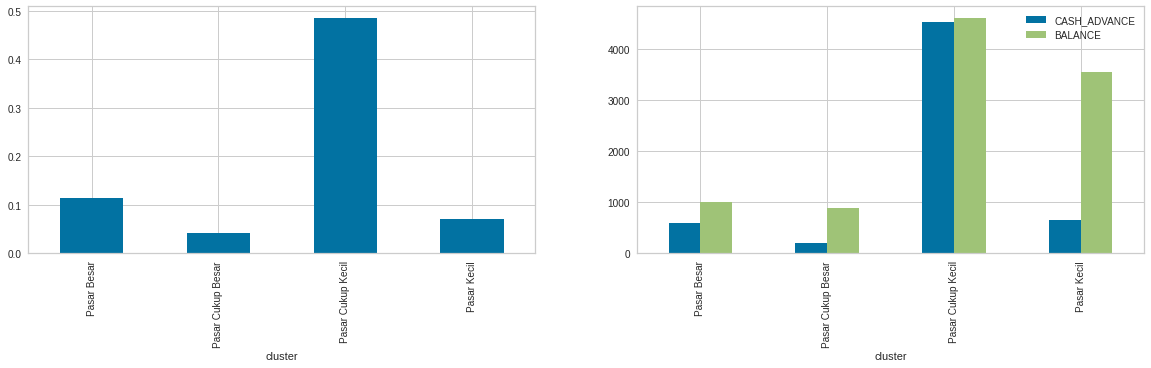

In [ ]:
ax = plt.subplot(2,2,1)
eval_df.groupby('cluster')['CASH_ADVANCE_FREQUENCY'].mean().plot(kind='bar', figsize=(20,10) ,ax=ax)
ax = plt.subplot(2,2,2)
eval_df.groupby('cluster')['CASH_ADVANCE', 'BALANCE'].mean().plot(kind='bar', figsize=(20,10), ax=ax)
plt.show()

Untuk kedua fitur ini, Pasar Cukup Kecil sangatlah mendominasi, artinya pasar ini memiliki frekuensi cash advance sering dilakukan dan sisa jumlah saldo yang sangat tinggi. Selain itu terlihat juga, Pasar Kecil memiliki sisa jumlah saldo yang cukup tinggi.

**Mari kita cek angka rata-rata cash advance dan balance kredit dari tiap kelompok!**

In [ ]:
eval_df.groupby('cluster')['CASH_ADVANCE', 'BALANCE'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CASH_ADVANCE,BALANCE
cluster,,
Pasar Besar,597.051145,1012.745945
Pasar Cukup Besar,209.816318,894.768927
Pasar Cukup Kecil,4521.509581,4602.449658
Pasar Kecil,653.638891,3551.153761


Dari data diatas yang kita dapatkan: 
- Rata-rata customer Pasar Cukup Kecil memiliki kebutuhan paling tinggi terhadap cash advance dan sisa saldo di rekeningnya pun paling tinggi.
- Rata-rata customer Pasar Kecil memiliki kebutuhan yang cukup rendah terhadap cash advance tetapi memiliki sisa saldo yang cukup tinggi.
- Rata-rata customer Pasar Cukup Besar memiliki kebutuhan yang rendah terhadap cash advance dan memiliki sisa saldo yang rendah juga.

In [ ]:
eval_df.groupby('cluster')['CASH_ADVANCE', 'BALANCE'].min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CASH_ADVANCE,BALANCE
cluster,,
Pasar Besar,0.0,0.000000
Pasar Cukup Besar,0.0,0.000000
Pasar Cukup Kecil,0.0,78.114579
Pasar Kecil,0.0,137.636267


Pasar Kecil dan Pasar Cukup Kecil adalah kelompok yang selalu memiliki sisa saldo dalam rekening kartu kreditnya.

In [ ]:
eval_df.groupby('cluster')['CASH_ADVANCE', 'BALANCE'].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CASH_ADVANCE,BALANCE
cluster,,
Pasar Besar,6523.780195,8115.039014
Pasar Cukup Besar,7894.578816,9502.256762
Pasar Cukup Kecil,47137.211760,16304.889250
Pasar Kecil,19513.474830,19043.138560


- Pasar Cukup Kecil memiliki kebutuhan paling besar terhadap cash advance dengan angka tertingginya mencapai 47137 USD.
- Pasar Cukup Kecil dan Pasar Kecil memiliki sisa saldo paling tinggi.
- Pasar Besar dan Pasar Cukup Besar memiliki cash advance dan sisa saldo yang cukup seragam angkanya, dan cenderung rendah.

# Kesimpulan

Dari informasi yang kita dapatkan diatas, kita mengetahui bahwa:
- **Pasar Kecil** adalah pasar yang memiliki angka pengeluaran dan jumlah saldo tertinggi, sehingga di asumsikan customer dalam kelompok ini memiliki pendapatan yang tinggi dan kebutuhan paling besar terhadap kartu kredit. Penyedia layanan credit card bisa memberikan penawaran yang lebih beragam dan cenderung eksklusif untuk para customer Pasar Kecil, pastinya harga penawaran yang tinggi pun selama memberikan keuntungan yang menggiurkan akan tetap bisa mereka terima dengan senang hati.

- **Pasar Cukup Kecil** adalah pasar yang memiliki kebutuhan paling tinggi terhadap cash advance dan jumlah saldo mereka pun tergolong cukup tinggi, tetapi cukup rendah untuk melakukan pembelian menggunakan credit card secara langsung. Sehingga bisa diasumsikan bahwa customer dalam kelompok ini memiliki pendapatan yang cukup tinggi dan kebutuhan yang lumayan besar juga terhadap penggunaan kartu kredit. Penyedia layanan credit card bisa memberikan penawaran yang cukup ekslusif bagi kelompok ini terutama yang berkaitan dengan cash advance, dan memberikan penawaran-penawaran menarik lainnya yang bisa menaikan keinginan customer kelompok ini untuk lebih sering melakukan pembelian menggunakan credit card. 

- **Pasar Cukup Besar** adalah pasar yang memiliki kebutuhan yang biasa saja terhadap kartu kredit. Penyedia layanan credit card bisa memberikan penawaran dengan harga standar tidak terlalu tinggi dan tidak terlalu rendah, memiliki keuntungan yang cukup penting bagi mereka sehingga mampu menaikan keinginan mereka untuk lebih sering menggunakan kartu kredit. Karena dilihat dari bagaimana kelompok ini tidak terlalu sering melakukan pembelian dengan kartu kredit, menunjukan adanya sikap tidak boros dan selalu berpikir sebelum membeli apapun. Penawaran dengan harga yang terlalu tinggi akan dirasa berlebihan bahkan merugikan bagi kelompok ini.

- **Pasar Besar** adalah pasar yang memiliki kebutuhan paling biasa saja terhadap kartu kredit. Penyedia layanan credit card bisa memberikan penawaran dengan harga standar tidak terlalu tinggi dan tidak terlalu rendah, memiliki keuntungan yang cukup penting bagi mereka sehingga mampu menaikan keinginan mereka untuk lebih sering menggunakan kartu kredit. Karena dilihat dari bagaimana kelompok ini tidak terlalu sering melakukan pembelian dengan kartu kredit, menunjukan adanya sikap tidak boros dan selalu berpikir sebelum membeli apapun. Penawaran dengan harga yang terlalu tinggi akan dirasa berlebihan bahkan merugikan bagi kelompok ini.

### Predictive Model

In [ ]:
pif = df['PURCHASES_INSTALLMENTS_FREQUENCY']
pf = df['PURCHASES_FREQUENCY']
caf = df['CASH_ADVANCE_FREQUENCY']
b = df['BALANCE']
ca = df['CASH_ADVANCE']

features = list(zip(pif, pf, caf, b, ca))
label = df['cluster']

In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(features, label)

pred = rf.predict(features)

In [ ]:
print("Random Forest:", accuracy_score(label, pred))

Random Forest: 1.0


In [ ]:
data_model = pd.DataFrame({'Actual':label, 'Predicted':pred})
data_model.head()

,Actual,Predicted
0,3,3
1,1,1
2,0,0
3,3,3
4,3,3


### Predictive System

**Prediksi 1**

In [ ]:
input_data = pd.DataFrame([[1,	1,
                            0, 2000000, 2000]])

sample = np.array(input_data)
sample_re = sample.reshape(1,-1)

prediction = rf.predict(sample_re)
print("Derajat kesehatan")
print("")
print("Jawaban:")
print(prediction)

if (prediction[0]==0):
  print("Pasar Cukup Besar")
elif (prediction[0]==1):  
  print("Pasar Cukup Kecil")
elif (prediction[0]==2):  
  print("Pasar Kecil")
else:
  print("Pasar Besar")


Derajat kesehatan

Jawaban:
[2]
Pasar Kecil


# Saving Model

In [ ]:
pickle.dump(kmeans, open('clustering.pkl', 'wb'))
pickle.dump(rf, open('prediction.pkl', 'wb'))